In [ ]:
#Random Forest Implementation

In [ ]:
#Importing dataset

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("data/train_u6lujuX_CVtuZ9i.csv")
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.index

RangeIndex(start=0, stop=614, step=1)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


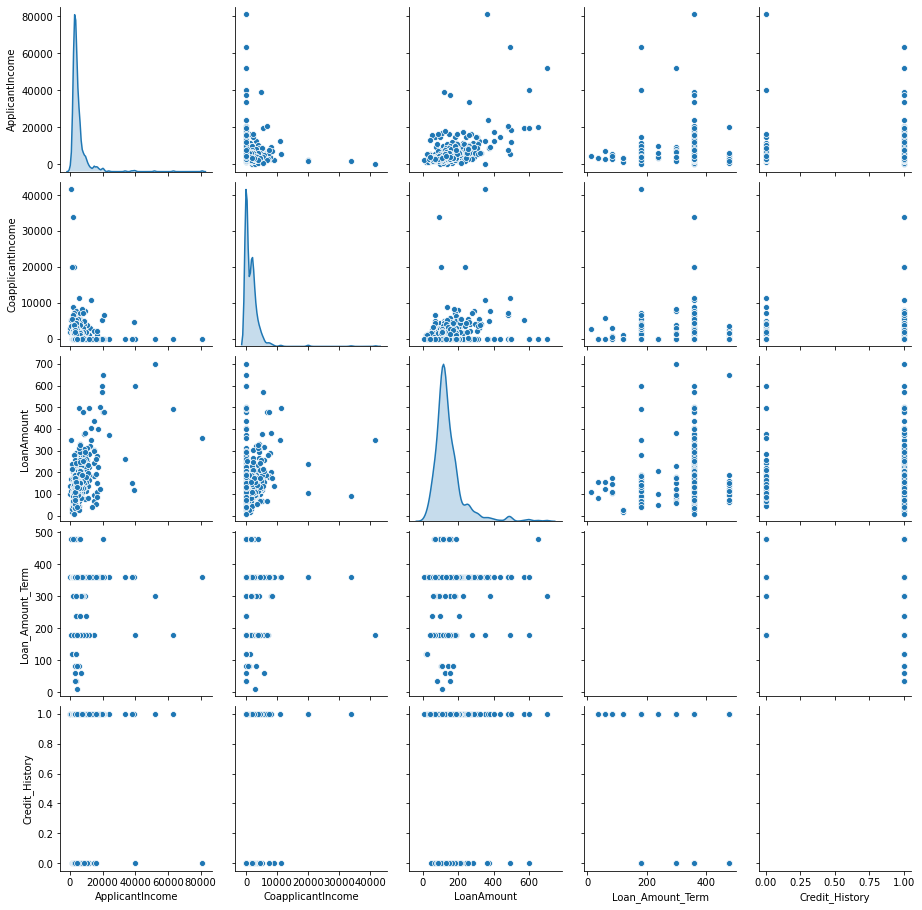

In [8]:
sns.pairplot(data=df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History','Property_Area','Loan_Status' ]], diag_kind="kde")
plt.show()

In [9]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [ ]:
#Split the dataset x values

In [12]:
X = df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History','Property_Area' ]][:].values.reshape(614, 12)
print(X)

[['LP001002' 'Male' 'No' ... 360.0 1.0 'Urban']
 ['LP001003' 'Male' 'Yes' ... 360.0 1.0 'Rural']
 ['LP001005' 'Male' 'Yes' ... 360.0 1.0 'Urban']
 ...
 ['LP002983' 'Male' 'Yes' ... 360.0 1.0 'Urban']
 ['LP002984' 'Male' 'Yes' ... 360.0 1.0 'Urban']
 ['LP002990' 'Female' 'No' ... 360.0 0.0 'Semiurban']]


In [ ]:
#Split the dataset y values

In [14]:
y = df[['Loan_Status']][:].values.reshape(614, 1)
print(y)

[['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['N']
 ['Y']
 ['N']
 ['Y']
 ['N']
 ['N']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['N']
 ['N']
 ['N']
 ['Y']
 ['N']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['N']
 ['N']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['N']
 ['N']
 ['N']
 ['N']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['N']
 ['N']
 ['N']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['N']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['Y']
 ['N']
 ['N']
 ['Y']
 ['N']
 ['N']
 ['N']
 ['Y']
 ['Y']

In [ ]:
#Implementing Random Forest Algorithm